## INTRODUCTION

https://colab.research.google.com/drive/1I1OllDt397CFA4CrCO2nAINN5iBge7qZ?authuser=1#scrollTo=B5IlrkHfH2it

We work for the oil extraction company OilyGiant. Our task is to identify the best locations for opening 200 new oil wells.

___Request___
- Build a model to predict the reserve volume in new wells.
- Choose the wells with the highest estimated values.
- Select the region with the highest total profit from the selected wells.

___Special conditions___
- The model should only use linear regression for training.
- During the exploration of the region, a study of 500 points is conducted, selecting the best 200 points for the profit calculation.
- The budget for the development of 200 oil wells is 100 million dollars.
- A barrel of raw materials generates 4.5 USD in revenue. The revenue from one unit of product is 4500 dollars (the reserve volume is expressed in thousands of barrels).
- After the risk evaluation, keep only the regions with a loss risk of less than 2.5%. Among those that meet the criteria, select the region with the highest average profit.


## DATA DESCRPITION

geo_data_0.csv / geo_data_1.csv / geo_data_2.csv

- id: unique identifier for the oil well
- f0, f1, f2: three features of the points (the specific meaning is not important, but the features themselves are significant)
- product: reserve volume in the oil well (thousands of barrels).

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression     
from sklearn.model_selection import train_test_split  
from sklearn.preprocessing import StandardScaler      
from sklearn.metrics import mean_squared_error        
from scipy import stats as stats                      
import matplotlib.pyplot as plt                       

In [2]:
# Getting Data sets
data_region1 = pd.read_csv('geo_data_0.csv')
data_region2 = pd.read_csv('geo_data_1.csv')
data_region3 = pd.read_csv('geo_data_2.csv')

### Region 1

In [3]:
data_region1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
data_region1.sample(5)

,id,f0,f1,f2,product
52007,Pwrta,0.198885,1.012560,2.728333,111.334140
76793,8J5he,1.255089,-0.387520,4.228812,82.462051
76590,Ko3kc,0.690017,0.747809,2.623526,67.365496
56892,aFbGx,2.093590,0.303996,5.118731,99.324773
88167,7oB0t,1.984086,0.319505,3.075140,106.570539


In [5]:
data_region1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


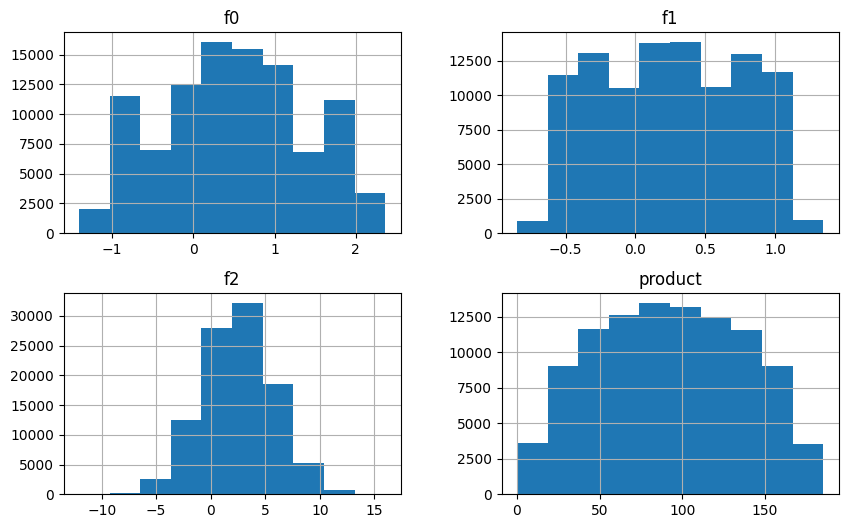

In [6]:
data_region1.hist(figsize=(10, 6))
plt.show()

Remarks
- Regarding the data from region 1, the following can be observed:
    - The product column has a normal distribution; however, its variance is high.
    - The f0, f1, and f2 columns seem to have a slight positive skew.

### Region 2

In [7]:
data_region2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [8]:
data_region2.sample(5)

,id,f0,f1,f2,product
9679,PzLS8,9.928434,-3.307266,4.002927,107.813044
12951,1w1yx,-3.896321,-10.191984,0.003289,3.179103
26361,yMmUV,-4.591716,-9.106359,4.002893,110.992147
43177,ey5EU,-8.777456,3.131253,1.993909,57.085625
92036,l5VCd,19.102529,-16.453482,4.998141,134.766305


In [9]:
data_region1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


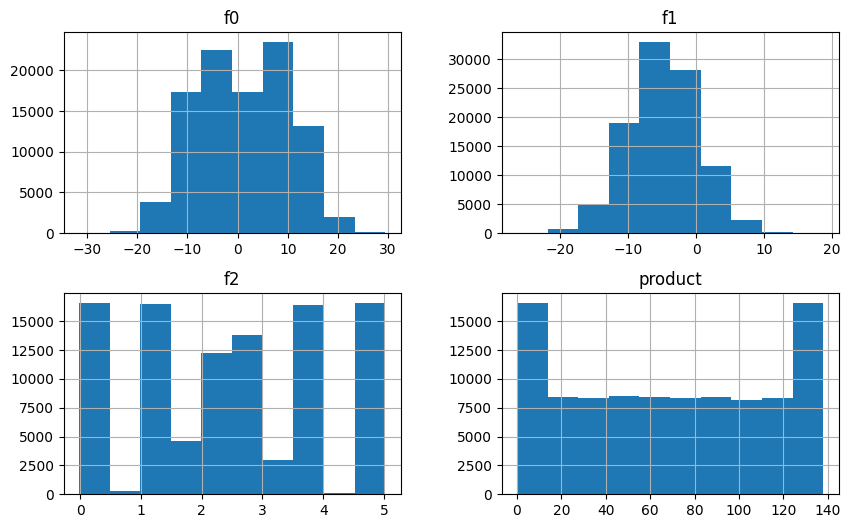

In [10]:
data_region2.hist(figsize=(10, 6))
plt.show()

Remarks
- Regarding the data from region 2, the following can be observed:
    - In the product column, we can notice peaks at the minimum and maximum values, while the distribution is very uniform in the center.
    - The f0 and f1 columns seem to have a more normal distribution, however, f2 has a more peculiar shape, presenting multiple peaks in different areas.

### Region 3

In [11]:
data_region3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [13]:
data_region3.sample(5)

,id,f0,f1,f2,product
89072,Egmom,-1.019680,0.968391,0.145168,33.064969
25163,mbC8H,-1.655014,-1.855646,3.108749,148.696529
20706,mqvlI,-0.277897,-0.231145,5.229298,104.222434
96870,k3yWS,2.265974,3.196473,4.163192,121.045689
21339,F51N6,-0.824782,0.178299,3.333559,30.634501


In [14]:
data_region1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


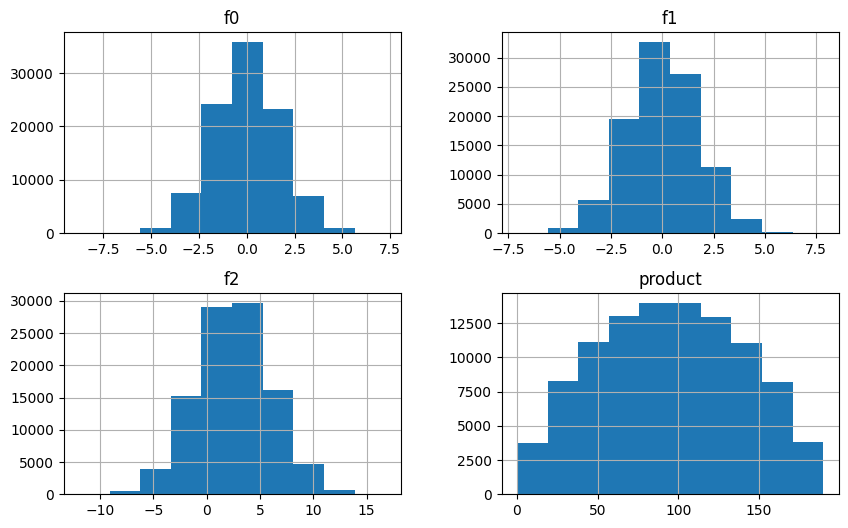

In [15]:
data_region3.hist(figsize=(10, 6)) 
plt.show()

Remarks
- Regarding the data from region 3, the following can be observed:
    - The four columns f0, f1, f2, and product follow a more normal distribution, although in the case of product, its variance is somewhat high again.

General conclusions prior to data preparation:
- The three dataframes do not require any adjustments or cleaning; however, we will remove the id column as it does not provide any value for the model.

## PRE-PROCESSING

In [16]:
data_region1 = data_region1.drop(columns='id')
data_region2 = data_region2.drop(columns='id')
data_region3 = data_region3.drop(columns='id')

## TRAINING MODELS

### Region 1

In [18]:
# Creating a Funtion

def split_75_25(df, target:str):
    
    # Getting features and target
    f = df.drop(target,axis = 1)
    t = df[target]
    
    # Standarizing values (Fom 0 to 1)
    scaler = StandardScaler()
    f = scaler.fit_transform(f)

    # Splitting data
    ft, fv, tt, tv = train_test_split(f,t, test_size=0.25, random_state=1996)
    
    # Training model
    model = LinearRegression()
    model.fit(ft, tt)
    
    pv = model.predict(fv) 
    rmse = mean_squared_error(tv, pv)**0.5 
    pv_mean = round(pv.mean(),2)
    
    return pv, rmse, pv_mean, tv

In [ ]:
# Getting Model
pvalid1, rmse1, pv_mean1, tvalid1 = split_75_25(data_region1,'product')
print(f"Average reserve volume prediction: {pv_mean1} (thousands of barrels)")
print(f"RSME: {rmse1}")

Average reserve volume prediction: 92.54
RSME: 37.82062583255158


### Region 2

In [22]:
pvalid2, rmse2, pv_mean2, tvalid2 = split_75_25(data_region2,'product')
print(f"Average reserve volume prediction: {pv_mean2} (thousands of barrels)")
print(f"RSME: {rmse2}")

Average reserve volume prediction: 68.22
RSME: 0.8881133566905981


### Region 3

In [24]:
pvalid3, rmse3, pv_mean3, tvalid3 = split_75_25(data_region3,'product')
print(f"Average reserve volume prediction: {pv_mean3} (thousands of barrels)")
print(f"RSME: {rmse3}")

Average reserve volume prediction: 95.24 (thousands of barrels)
RSME: 39.893676409558154


In [27]:
# Creating a DF with the results
index = ['Region1','Region2','Region3']
rmse = np.array([rmse1,rmse2,rmse3])
mean = np.array([pv_mean1,pv_mean2,pv_mean3])
limite_inf = mean - rmse
limite_sup = mean + rmse
comparativas = pd.DataFrame({'rmse':rmse,
                             'mean_volumne':mean,''
                             'lower_limit':limite_inf,
                             'upper_limit':limite_sup}
                            ,index = index)
comparativas

,rmse,mean_volumne,lower_limit,upper_limit
Region1,37.820626,92.54,54.719374,130.360626
Region2,0.888113,68.22,67.331887,69.108113
Region3,39.893676,95.24,55.346324,135.133676


Remarks

- Regarding the mean predicted volume in the 3 regions, regions 1 and 3 seem to have a higher probability of meeting the 200 well requirement, although they have a higher mean squared error compared to region 2. It will need to be determined through a calculation whether this statement is correct.
- It will also be necessary to evaluate if there are 200 available wells in each region to meet the requirement of generating 100 million USD in profit.

## PROFIT CALCULATIONS

In [35]:
# Creating a function
def revenue(target,predictions,count):
    
    points = 500             #Study Points in the Variable
    best_points = 200
    budget_200 = 100000000   #Total budget for the  200 barrels
    revenue_per_unit = 4500  #Profit per unit
    revenue_per_barril = 4.5 #Profit per barrel    

    # Sorting the prediction values in descending order. (Higher to Lower Volumnes)
    p_sorted = pd.Series(predictions).sort_values(ascending=False)

    # Getting the top n = count real values using the predictions
    top_n = target.reset_index(drop=True).iloc[p_sorted.index][:count]
    
    # Getting the total volumen of real values (target)
    total_volume = top_n.sum()

    # Calculating the total income [Volume * Price per unit]
    income = total_volume * revenue_per_unit
    
    # Calculating the cost of developing n wells, taking into account the construction cost.
    cost_per_well = (count * budget_200)  / best_points
    
    return round(income - cost_per_well, 2)

In [36]:
# Region 1
total1 = revenue(tvalid1,pvalid1,200)
print(f'Total income - region 1: {total1}\n')

# Region 2
total2 = revenue(tvalid2,pvalid2,200)
print(f'Total income - region 2: {total2}\n')

# Region 3
total3 = revenue(tvalid3,pvalid3,200)
print(f'Total income - region 3: {total3}')

Total income - region 1: 32713996.92

Total income - region 2: 24150866.97

Total income - region 3: 22367671.34


Remarks
- Taking into account the predictions of the top 200, region 1 has the best potential income according to the predictions. Considering the RMSE and the average volume, it has shown better results in the top 200 compared to regions 2 and 3. It is important to note that, so far, all regions have a positive profit exceeding the investment amount.

## RISK AND PROFIT CALCULATIONS

In [38]:
# Creating function

def bstrapping_c_interval(target,predictions):
    target = target.reset_index(drop=True) 
    state = np.random.RandomState(1996)

    values = []
    for i in range(1000):   
        t_subsample = target.sample(n=500, replace=True, random_state=state)
        p_subsample = predictions[t_subsample.index]
        values.append(revenue(t_subsample, p_subsample, 200))

    values = pd.Series(values)

    # Getting the quantiles
    lower = values.quantile(0.025)  
    upper = values.quantile(0.975)
    c_interval = [lower,upper]

    # Getting the average profit after bootstrapping.
    mean = values.mean()

    # Calculating the risk of loss
    n_values = values[values <0].count()
    p_values = values[values >0].count()
    loss_pct = (n_values / p_values) *100
    
    return values, mean, c_interval, loss_pct

### Region 1

In [39]:
revenues_1, mean_revenue_1, c_interval_1, loss_risk_1 = bstrapping_c_interval(tvalid1,pvalid1)
print(f"""
    << Data obtained from Region 1 >>
    Revenue: {round(mean_revenue_1,2)}
    Lower confidence interval 95%: {round(c_interval_1[0],2)}
    Upper confidence interval 95%: {round(c_interval_1[1],2)}
    Loss risk: {round(loss_risk_1,2)}%
""")


    << Data obtained from Region 1 >>
    Revenue: 3941587.05
    Lower confidence interval 95%: -917654.4
    Upper confidence interval 95%: 8861304.96
    Loss risk: 5.71%



### Region 2

In [40]:
revenues_2, mean_revenue_2, c_interval_2, loss_risk_2 = bstrapping_c_interval(tvalid2,pvalid2)
print(f"""
    << Data obtained from Region 2 >>
    Revenue: {round(mean_revenue_2,2)}
    Lower confidence interval 95%: {round(c_interval_2[0],2)}
    Upper confidence interval 95%: {round(c_interval_2[1],2)}
    Loss risk: {round(loss_risk_2,2)}%
""")    


    << Data obtained from Region 2 >>
    Revenue: 3924003.08
    Lower confidence interval 95%: -98266.69
    Upper confidence interval 95%: 7927657.69
    Loss risk: 2.88%



### Region 3

In [41]:
revenues_3, mean_revenue_3, c_interval_3, loss_risk_3 = bstrapping_c_interval(tvalid3,pvalid3)
print(f"""
    << Data obtained from Region 3 >>
    Revenue: {round(mean_revenue_3,2)}
    Lower confidence interval 95%: {round(c_interval_3[0],2)}
    Upper confidence interval 95%: {round(c_interval_3[1],2)}
    Loss risk: {round(loss_risk_3,2)}%
""")   


    << Data obtained from Region 3 >>
    Revenue: 3423171.08
    Lower confidence interval 95%: -1970051.55
    Upper confidence interval 95%: 8637090.93
    Loss risk: 11.86%



## FINAL CONCLUTION

Once the bootstrapping method was performed, we can determine that region 2 is the region with the highest probability of generating income and experiencing the least amount of losses, despite initially appearing to be the least favorable. This contrasts with the results obtained before bootstrapping, where region 1 or 3 seemed more promising. In this case, they show a higher percentage of risk but with better benefits.